# Dataset Exploration

Six key diagnostics for the StepMania chart dataset.

In [9]:
import sys
sys.path.insert(0, '..')

import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

from src.data.stepmania_parser import StepManiaParser

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [19]:
# Parse all charts
DATA_DIR = '../data/external'
parser = StepManiaParser()

charts = []  # List of (song_title, difficulty, tensor)
failed = []

for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        if file.endswith('.sm'):
            path = os.path.join(root, file)
            try:
                result = parser.process_chart(path)
                if result:
                    chart, tensors = result
                    for i, nd in enumerate(chart.note_data):
                        charts.append({
                            'song': chart.title,
                            'difficulty': nd.difficulty_value,
                            'tensor': tensors[i],
                            'seq_len': tensors[i].shape[0]
                        })
            except Exception as e:
                failed.append((path, str(e)))

print(f"Parsed {len(charts)} charts from {len(set(c['song'] for c in charts))} songs")
print(f"Failed: {len(failed)}")

Error processing ../data/external/pack_354_45296d/GRADIUSIC CYBER (CLUB ANOTHER VER.)/GRADIUSIC CYBER (CLUB ANOTHER VER.).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_354_45296d/THE EARTH LIGHT/THE EARTH LIGHT.sm: Variable BPM not supported in Phase 1
OVERDOSER (CLUB 2P VER.) failed song length requirement
Error processing ../data/external/pack_354_45296d/GRADIUSIC CYBER/GRADIUSIC CYBER.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_354_45296d/Macho Gang/Macho Gang.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_354_45296d/ska a go go/ska a go go.sm: Variable BPM not supported in Phase 1
22DUNK (CLUB ANOTHER VER.) failed song length requirement
KEEP ON MOVIN' (CLUB VER.) failed song length requirement
Into the world failed song length requirement
22DUNK failed song length requirement
Error processing ../data/external/pack_354_45296d/g.m.d/g.m.d.sm: Variable BPM not supported in Phase 

Error processing ../data/external/pack_356_e3e829/ABSOLUTE (Cuff -N- Stuff it Mix)/ABSOLUTE (Cuff -N- Stuff it Mix).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_859_e41bae/B4U (B4 ZA BEAT MIX)/B4U (B4 ZA BEAT MIX).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_859_e41bae/DROP THE BOMB/DROP THE BOMB.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_859_e41bae/SO IN LOVE/SO IN LOVE.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_859_e41bae/KEEP ON MOVIN'/KEEP ON MOVIN'.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_859_e41bae/i feel/i feel.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_5_4cdbd9/Let's Dance/Let's Dance.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_37_807d1e/Have You Never Been Mellow/Have You Never Been Mellow.sm: Variable BPM not supporte

Error processing ../data/external/pack_120_33f5d7/Got To Be Real/Got To Be Real.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_120_33f5d7/Say Goodbye/Say Goodbye.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_120_33f5d7/LE FREAK/LE FREAK.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_120_33f5d7/Suddenly I See/Suddenly I See.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_120_33f5d7/Love On My Mind (Radio Mix)/Love On My Mind (Radio Mix).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_156_9b52d8/THIS IS THE LIFE/THIS IS THE LIFE.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_156_9b52d8/KIM POSSIBLE THEME SONG/KIM POSSIBLE THEME SONG.sm: Variable BPM not supported in Phase 1
SUITE LIFE THEME SONG failed bpm requirement
Error processing ../data/external/pack_156_9b52d8/THAT'S SO RAVEN THEME

[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_com

## 1. Charts per Difficulty

Shows class imbalance and missing difficulty levels.

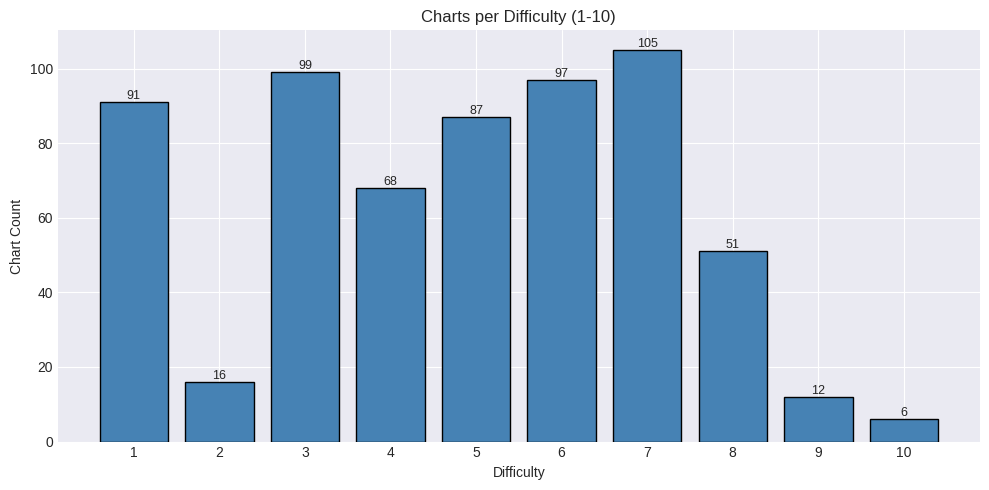

In [11]:
difficulties = [c['difficulty'] for c in charts]
diff_counts = {d: difficulties.count(d) for d in range(1, 11)}

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(diff_counts.keys(), diff_counts.values(), color='steelblue', edgecolor='black')
ax.set_xlabel('Difficulty')
ax.set_ylabel('Chart Count')
ax.set_title('Charts per Difficulty (1-10)')
ax.set_xticks(range(1, 11))

for d, count in diff_counts.items():
    ax.annotate(str(count), (d, count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Check for issues
if 0 in diff_counts.values():
    print("WARNING: Missing difficulty classes!")
if max(diff_counts.values()) > 3 * min(d for d in diff_counts.values() if d > 0):
    print("WARNING: Significant class imbalance - consider class weighting")

## 2. Songs per Difficulty

Checks if some difficulties are "fake plentiful" (many charts, few unique songs).

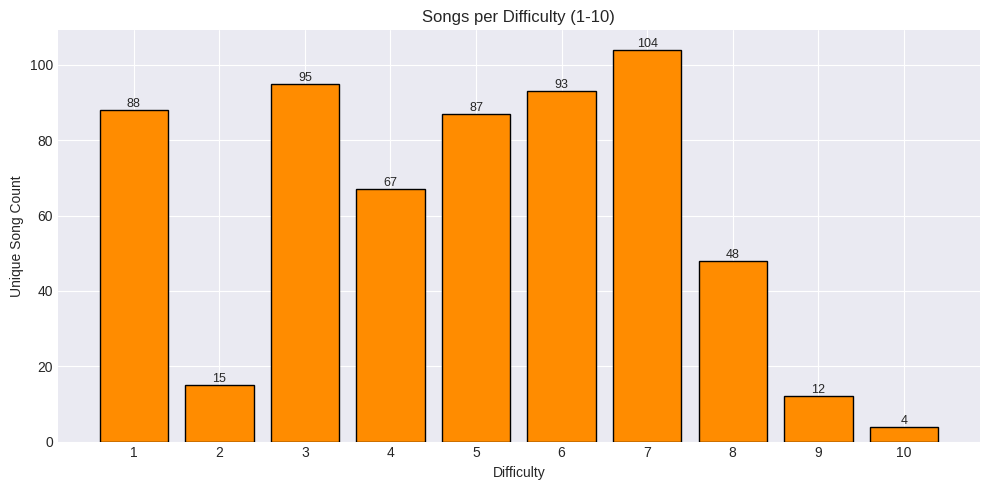

In [12]:
songs_per_diff = defaultdict(set)
for c in charts:
    songs_per_diff[c['difficulty']].add(c['song'])

song_counts = {d: len(songs_per_diff[d]) for d in range(1, 11)}

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(song_counts.keys(), song_counts.values(), color='darkorange', edgecolor='black')
ax.set_xlabel('Difficulty')
ax.set_ylabel('Unique Song Count')
ax.set_title('Songs per Difficulty (1-10)')
ax.set_xticks(range(1, 11))

for d, count in song_counts.items():
    ax.annotate(str(count), (d, count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 3. Charts per Song

Shows how much audio reuse there is across difficulty levels.

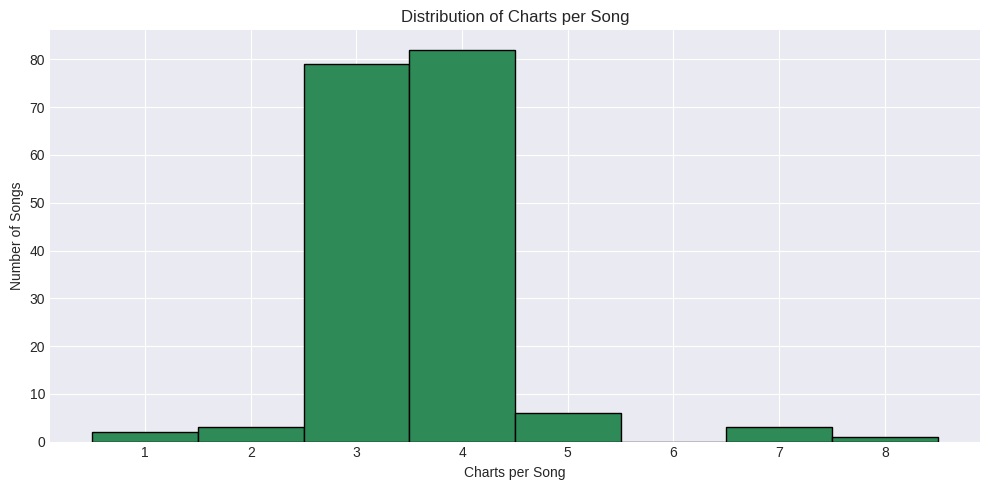

Mean: 3.6 charts/song
Median: 4 charts/song


In [13]:
charts_per_song = defaultdict(int)
for c in charts:
    charts_per_song[c['song']] += 1

counts = list(charts_per_song.values())

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(counts, bins=range(1, max(counts) + 2), color='seagreen', edgecolor='black', align='left')
ax.set_xlabel('Charts per Song')
ax.set_ylabel('Number of Songs')
ax.set_title('Distribution of Charts per Song')
ax.set_xticks(range(1, max(counts) + 1))

plt.tight_layout()
plt.show()

print(f"Mean: {np.mean(counts):.1f} charts/song")
print(f"Median: {np.median(counts):.0f} charts/song")

## 4. Sequence Length Distribution

Ensures max_sequence_length isn't silently truncating data.

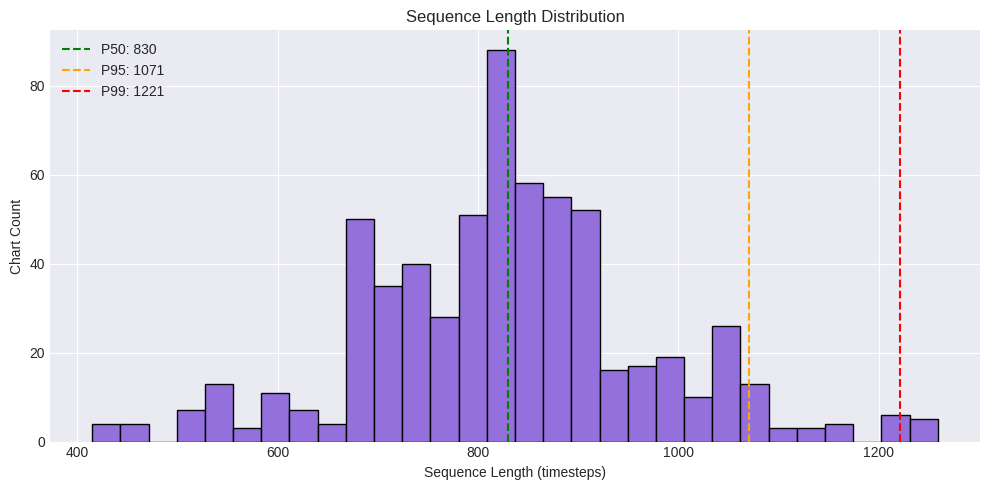

Min: 415, Max: 1259
Recommended max_sequence_length (P95): 1071


In [14]:
seq_lengths = [c['seq_len'] for c in charts]

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(seq_lengths, bins=30, color='mediumpurple', edgecolor='black')
ax.set_xlabel('Sequence Length (timesteps)')
ax.set_ylabel('Chart Count')
ax.set_title('Sequence Length Distribution')

# Add percentile lines
p50 = np.percentile(seq_lengths, 50)
p95 = np.percentile(seq_lengths, 95)
p99 = np.percentile(seq_lengths, 99)
ax.axvline(p50, color='green', linestyle='--', label=f'P50: {p50:.0f}')
ax.axvline(p95, color='orange', linestyle='--', label=f'P95: {p95:.0f}')
ax.axvline(p99, color='red', linestyle='--', label=f'P99: {p99:.0f}')
ax.legend()

plt.tight_layout()
plt.show()

print(f"Min: {min(seq_lengths)}, Max: {max(seq_lengths)}")
print(f"Recommended max_sequence_length (P95): {int(p95)}")

## 5. Step Density vs Difficulty

Should trend upward. If not, something's wrong upstream.

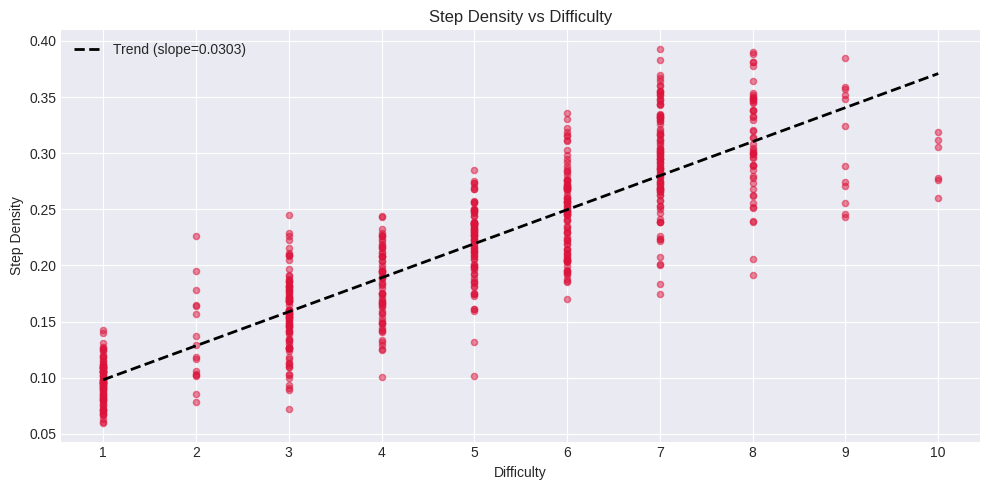

In [15]:
def step_density(tensor):
    """Fraction of timesteps with at least one note"""
    return np.mean(np.sum(tensor, axis=1) > 0)

densities = [(c['difficulty'], step_density(c['tensor'])) for c in charts]
diffs, dens = zip(*densities)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(diffs, dens, alpha=0.5, color='crimson', s=20)

# Add trend line
z = np.polyfit(diffs, dens, 1)
p = np.poly1d(z)
ax.plot(range(1, 11), p(range(1, 11)), 'k--', linewidth=2, label=f'Trend (slope={z[0]:.4f})')

ax.set_xlabel('Difficulty')
ax.set_ylabel('Step Density')
ax.set_title('Step Density vs Difficulty')
ax.set_xticks(range(1, 11))
ax.legend()

plt.tight_layout()
plt.show()

if z[0] <= 0:
    print("WARNING: Step density does not increase with difficulty!")

## 6. Jump Ratio vs Difficulty

Checks that chart complexity (jumps) aligns with difficulty labels.

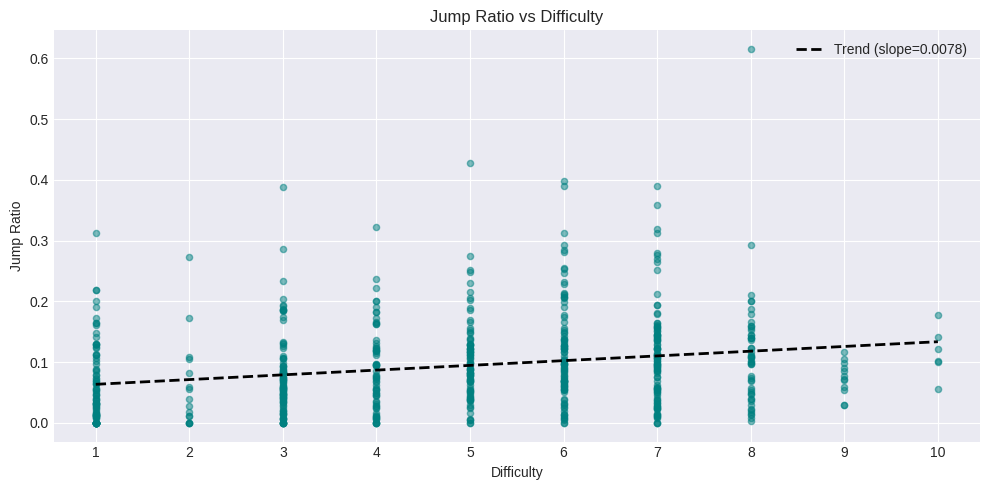

In [16]:
def jump_ratio(tensor):
    """Fraction of active timesteps that are jumps (2 simultaneous notes)"""
    notes_per_step = np.sum(tensor, axis=1)
    active_steps = notes_per_step > 0
    if np.sum(active_steps) == 0:
        return 0
    jumps = notes_per_step == 2
    return np.sum(jumps) / np.sum(active_steps)

jump_data = [(c['difficulty'], jump_ratio(c['tensor'])) for c in charts]
diffs, jumps = zip(*jump_data)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(diffs, jumps, alpha=0.5, color='teal', s=20)

# Add trend line
z = np.polyfit(diffs, jumps, 1)
p = np.poly1d(z)
ax.plot(range(1, 11), p(range(1, 11)), 'k--', linewidth=2, label=f'Trend (slope={z[0]:.4f})')

ax.set_xlabel('Difficulty')
ax.set_ylabel('Jump Ratio')
ax.set_title('Jump Ratio vs Difficulty')
ax.set_xticks(range(1, 11))
ax.legend()

plt.tight_layout()
plt.show()

if z[0] <= 0:
    print("WARNING: Jump ratio does not increase with difficulty!")